In [1]:
import tensorflow as tf
import keras 
import matplotlib
import numpy


In [2]:
import os

In [3]:
path = "C:\\Users\\USER\\Documents\\datasets\\Face Dataset"

In [12]:
classes = os.listdir(path)

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "training",
    seed = 123
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "validation",
    seed = 123
)

Found 2062 files belonging to 5 classes.
Using 1650 files for training.
Found 2062 files belonging to 5 classes.
Using 412 files for validation.


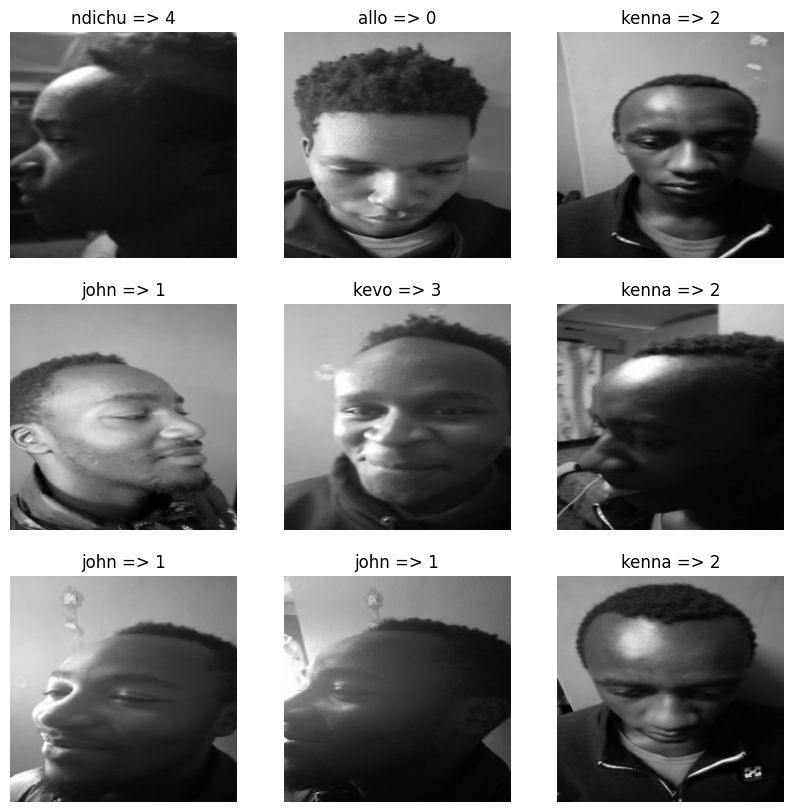

In [13]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{classes[labels[i]]} => {labels[i]}")
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 256, 256, 3)
(16,)


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [19]:
from keras import layers

In [20]:
normalization_layer = layers.Rescaling(1. / 255)

In [34]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]


In [35]:
import numpy as np

In [36]:
np.max(first_image)

0.9029259

In [37]:
num_classes = len(class_names)

model = keras.models.Sequential()

In [38]:
model.add(layers.Rescaling(1. / 255, input_shape = (256, 256, 3)))

In [39]:
model.add(layers.Conv2D(16, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(62, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(num_classes))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 62)       

In [41]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [42]:
epochs = 1
model.fit(train_ds, test_ds, epochs = epochs)

ValueError: `y` argument is not supported when using dataset as input.